# 5주차 실습문제 - 데이터의 결합 및 상관관계 분석

***

In [2]:
# 아래의 라이브러리를 사용하므로 미리 임포트해 두기 바랍니다.
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

'%.3f'

## 데이터의 결합

In [3]:
hn18 = pd.read_csv('health2018.csv')
hn18

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111
...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108


In [4]:
hn18_add = pd.read_csv('hn18_add.csv')
hn18_add

,ID,sex,age,cholesterol,BP_systole,BP_diastole
0,A901020501,M,80,111,150,84
1,A901021301,M,78,224,132,77
2,A901021302,F,75,165,156,73
3,A901022601,F,43,197,102,70
4,A901023303,F,80,160,149,81
...,...,...,...,...,...,...
5963,R904028502,F,35,185,93,63
5964,R904028503,F,66,180,98,63
5965,R904028902,F,73,160,136,82
5966,R904029201,M,43,216,122,99


## 1. 데이터의 결합과 검사
### 1-1. 내부결합을 이용해 두 데이터 hn18과 hn18_add를 결합해 hdat 변수에 저장하고 .describe() 메소드를 이용해 요약값을 출력하라.

In [5]:
hdat = pd.merge(hn18, hn18_add, how='inner')
hdat.describe()

,age,height,weight,waist,BMI,Blood_glucose,cholesterol,BP_systole,BP_diastole
count,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000
mean,51.339645,163.471498,64.316354,82.288003,23.962628,101.275972,191.203251,118.811997,75.618130
std,16.688646,9.432172,12.559136,10.207824,3.523740,22.919817,37.585544,16.773629,10.292461
min,19.000000,132.500000,32.200000,56.800000,14.661224,51.000000,68.000000,76.000000,35.000000
25%,38.000000,156.600000,55.200000,74.900000,21.521822,89.000000,165.000000,106.000000,69.000000
50%,52.000000,163.000000,62.700000,82.200000,23.639372,96.000000,190.000000,116.000000,75.000000
75%,64.000000,170.400000,72.000000,89.200000,26.001326,104.250000,215.000000,129.000000,82.000000
max,80.000000,195.000000,144.200000,130.300000,43.918639,338.000000,457.000000,205.000000,139.000000


### 1-2. hdat 데이터프레임 객체에서 중복값이 있는지 검사하라.
중복된 행의 총 갯수를 세려면 어떻게 해야할까? (중복 여부만 보여주고, 중복된 행의 갯수를 세지 못할 경우, 50% 감점)

In [6]:
dup = hdat.duplicated()
duplicated_row = 0

for d in dup :
    if d == True :
        duplicated_row += 1
print(pd.unique(dup), duplicated_row)

[False] 0


## 2. 상관관계 분석
### 2-1. 수축기 혈압(BP_systole)과 다른 수치 간의 선형 상관관계(Pearson correlation, R)를 계산하라.
가장 상관관계가 높은 변수는 무엇인가? 두번째로 상관관계가 높은 변수는 무엇인가? 

In [ ]:
hdat_pearson = hdat.corrwith(hdat.BP_systole, numeric_only=True, method='pearson')
hdat_pearson.sort_values(ascending=False)

BP_systole       1.000000
BP_diastole      0.592261
age              0.415583
waist            0.327542
BMI              0.257535
Blood_glucose    0.222923
weight           0.128119
cholesterol      0.057081
height          -0.114650
dtype: float64

1. 첫번째로 상관관계가 높은 변수 : BP_diastole
2. 두번째로 상관관계가 높은 변수 : age

### 2-2. 수축기 혈압(BP_systole)과 다른 수치 간의 상관관계를 Spearman correlation으로 구해보시오.
Pearson correlation으로 구한 값보다 0.1 이상 늘어난 항목이 있는가? 있다면 답하시오.
* 참고: round( number, 3 ) 으로 소수점 셋째자리에서 반올림 가능.

In [8]:
hdat_spearman = hdat.corrwith(hdat.BP_systole, numeric_only=True, method='spearman')
(round(hdat_spearman, 3) - round(hdat_pearson,3)).sort_values(ascending=False)

Blood_glucose    0.113
weight           0.041
waist            0.040
BMI              0.039
height           0.036
age              0.014
BP_diastole      0.012
BP_systole       0.000
cholesterol     -0.004
dtype: float64

Blood_glucose값이 0.1이상 늘어났다.

### 2-3. 수축기 혈압(BP_systole)과 이완기 혈압(BP_diastole)의 상관관계를 regplot을 이용해 그리시오.
x축은 수축기 혈압, y축은 이완기 혈압으로 그릴 것. 

되도록이면 각 점의 크기(marker size)를 1로 줄여서 전체 분포가 잘 드러나도록 하시오 (부분점수 50%)

<Axes: xlabel='BP_systole', ylabel='BP_diastole'>

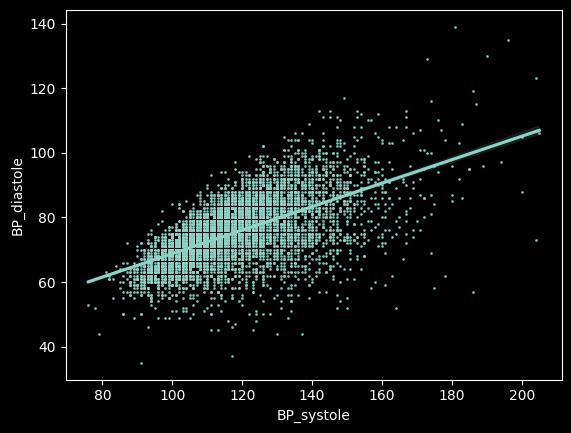

In [9]:
sns.regplot(data=hdat, x = 'BP_systole', y = 'BP_diastole', scatter_kws= {'s' : 1})

### 2-4. 나이(age)와 수축기 혈압(BP_systole)의 상관관계를 regplot과 boxplot을 이용해 그려 비교해보시오.
x축은 나이, y축은 수축기 혈압. regplot으로 그린 분포와, boxplot으로 그린 분포를 비교해보고, 나이에 따라 수축기 혈압이 일정하게 변하는 경향성이 있는지 답하시오.

<Axes: xlabel='age', ylabel='BP_systole'>

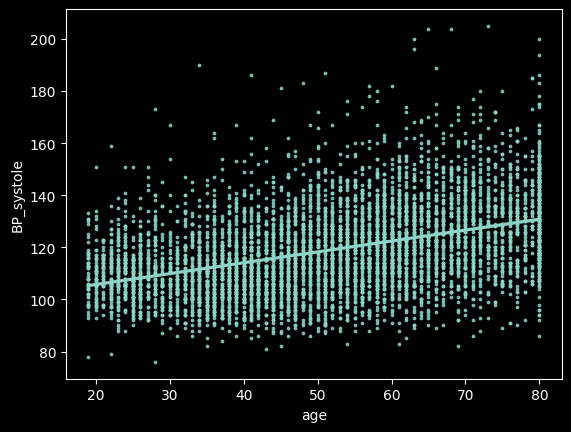

In [10]:
sns.regplot(data=hdat, x = 'age', y = 'BP_systole', scatter_kws={'s' : 3})

([<matplotlib.axis.XTick at 0x124785e10>,
 [Text(1, 0, '20'),
  Text(11, 0, '30'),
  Text(21, 0, '40'),
  Text(31, 0, '50'),
  Text(41, 0, '60'),
  Text(51, 0, '70'),
  Text(61, 0, '80')])

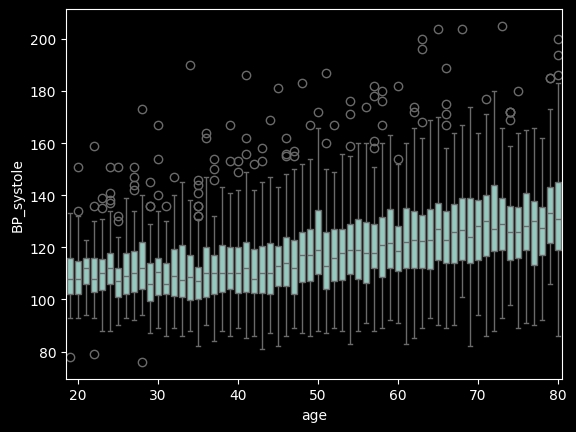

In [19]:
sns.boxplot(x = 'age', y = 'BP_systole', data=hdat)
plt.xticks(ticks = range(1, len(hdat['age'].unique()), 10))

나이에 따라 수축기 혈압이 상승하는 방향으로 일정하게 변하는 경향이 있다. 

## 3. pairplot을 이용한 데이터 시각화
### 3-1. 여성에서 수축기 혈압(BP_systole)과 가장 상관관계가 높은 변수 3가지를 찾으시오.
1, 2, 3순위인 변수를 주석으로 답하시오. (순위별로 정렬해서 나오도록 코드로 구현하면 가산점 +20%)
* 여성으로 데이터를 한정할 것.
* 자기자신(BP_systole)과의 상관관계는 순위에서 제외.

In [ ]:
hdat_female = hdat[hdat['sex'] == 'F']
corr_female = hdat_female.corrwith(hdat_female.BP_systole, numeric_only=True)
corr_female = corr_female.drop('BP_systole')
corr_female.sort_values(ascending=False)
# 1순위 : BP_diastole, 2순위 : age, 3순위 waist

BP_diastole      0.619344
age              0.511736
waist            0.365972
BMI              0.287480
Blood_glucose    0.267038
weight           0.097354
cholesterol      0.065456
height          -0.339240
dtype: float64

### 3-2. 위의 3가지 변수에 수축기 혈압(BP_systole)을 더해 총 4가지 변수 간의 상호관계를 pairplot으로 그려 살펴보시오.
점들이 너무 빽빽하게 뭉친다면, 적절한 옵션을 추가해 데이터의 분포가 명확히 드러나도록 할 것 (부분점수 50%).

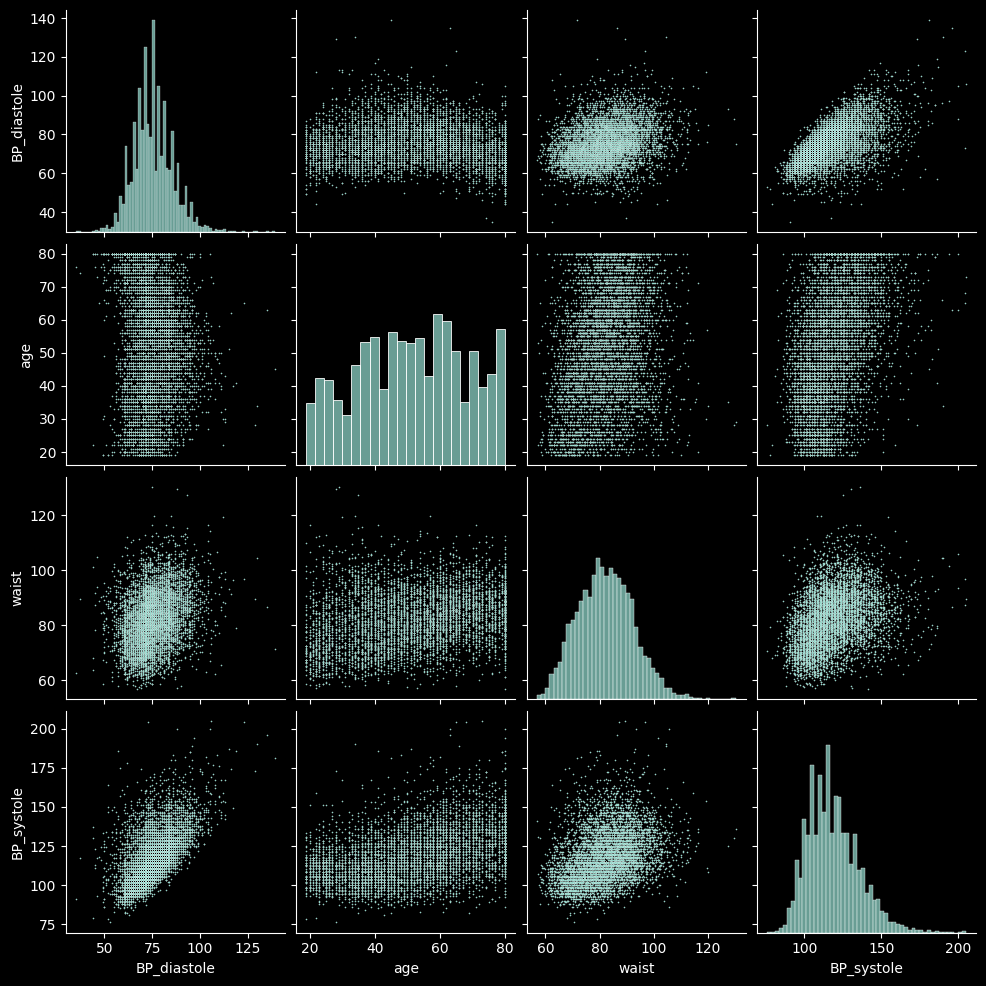

In [53]:
sns.pairplot(hdat, vars = ['BP_diastole', 'age', 'waist', 'BP_systole'], plot_kws={'s' : 1})

### 3-3. 3-1에서 찾은 3가지 변수 간의 상관관계에 대해 서술하시오. 
각각 어떤 관계에 있는가? Pearson correlation을 구해 참고해도 좋음.

In [54]:
hdat_select = hdat[['BP_diastole', 'age', 'waist']]
corr_select = hdat_select.corr(numeric_only = True, method='pearson')
corr_select

,BP_diastole,age,waist
BP_diastole,1.000000,-0.044287,0.278485
age,-0.044287,1.000000,0.251193
waist,0.278485,0.251193,1.000000


1. BP_diastole과 age
- 음의 상관관계를 보이며 0에 가까운 값을 가지기에 사실상 상관관계가 거의 없다.

2. BP_diastole과 waist
- 조금 낮은 양의 상관관계를 보이며 waist가 증가할수록 BP_diastole이 약간 증가하는 경향이 있다.

3. age와 waist
- 조금 낮은 양의 상관관계를 보이며 age가 증가할수록 허리둘레가 약간 증가하는 경향이 있다.